### Multiclass Classification Project
**Problem** -->

SVM is binary Classifier and here we need to do muti class classification

**Solution** -->

we have two approaches to solve the classification problems
1. one vs one
2. one vs rest

we are not using one vs one method here because we have a large dataset and 
this method has time complexity O(N*2).

so, we are going to use one vs rest method.
        ![](multiclass.jpeg)


 


In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

### Dataset Preparation

In [166]:
from pathlib import Path
from keras.preprocessing import image

Here I am using a dataset of dogs,cats,horses and humans
   ![](dog.jpeg)
   ![](humanandhorse.jpeg)
   ![](images.jpeg)

In [167]:
p = Path("/home/abheeshth/Desktop/images") # path to my images folder
dirs = p.glob("*")  # it gives us a generater object so we can iterate all over the folder

labels_dict = {"cat":0,"dog":1,"horse":2,"human":3}

image_data = []
labels = []


for folder_dir in dirs:
    print(folder_dir)
    label = str(folder_dir).split("/")[-1][:-1] # extracting labels from path
    print(label)
    
    for img_path in folder_dir.glob("*.jpg"): # iterate over all the images
        #img = image.load_img(img_path,target_size = (100,100)) #it is the image with it's full features
        img = image.load_img(img_path,target_size = (32,32)) # target size basically adjust features of a imaget
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

/home/abheeshth/Desktop/images/humans
human
/home/abheeshth/Desktop/images/cats
cat
/home/abheeshth/Desktop/images/dogs
dog
/home/abheeshth/Desktop/images/horses
horse


In [168]:
print(len(image_data))
print(len(labels))
print(labels)

808
808
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [169]:
# convert this into numpy array
image_data = np.array(image_data,dtype = 'float32')/255.0 # we write a condition on if image size is not lying in range(0,255)
labels = np.array(labels)

print(image_data.shape,labels.shape)

(808, 32, 32, 3) (808,)


### Randomly Shuffle the data

In [170]:
# we are doing some random shuffling in our data to avoid any type of overfitting
import random
combined = list(zip(image_data,labels)) 
#zip --> we do not want that image_data and labels both are shuffeled in different way ,it can distrub our mapping  
random.shuffle(combined)


#unzip
image_data[:],labels[:] = zip(*combined)

### visualize the data

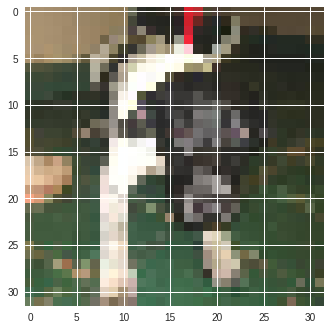

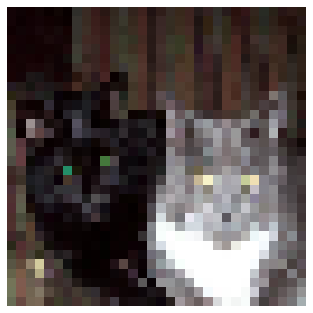

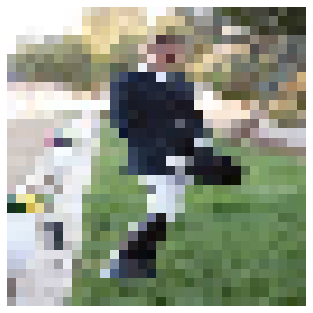

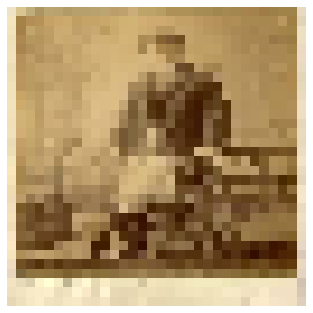

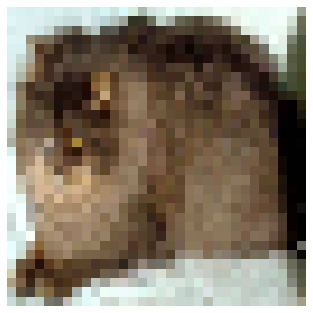

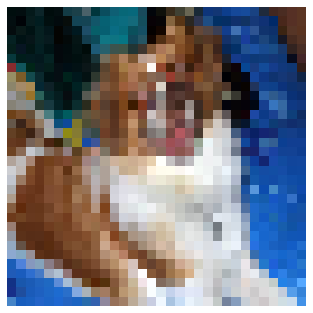

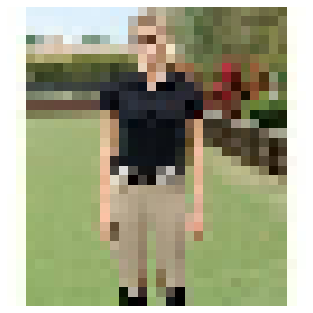

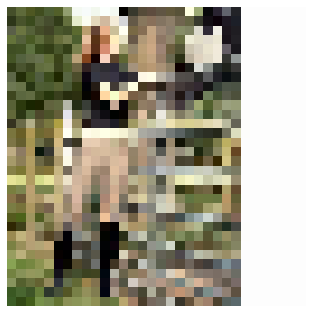

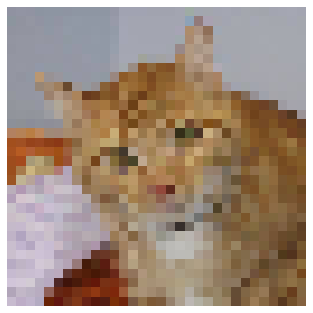

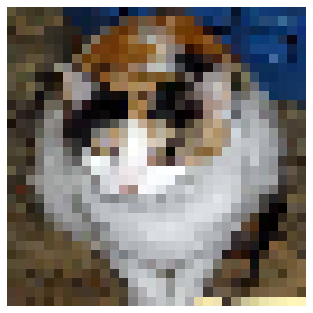

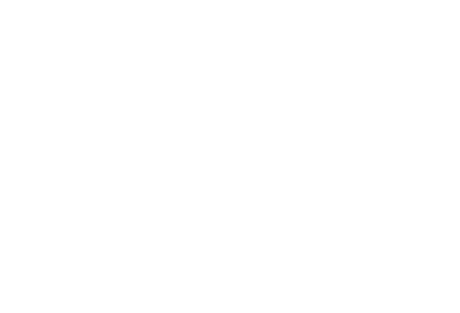

In [171]:
# visualize this data
def drawing(img):
    plt.imshow(img)
    plt.show()
    plt.axis("off")
    return 

for i in range(10):
    drawing(image_data[i])
    
"""Images are blur because we removed  some features from images to simplyfy our calculation"""

In [172]:
# it is the code of SVM algorithm from scratch
# we can simply import this from scikit
class SVM:
    """SVM Class, Author : Prateek Narang"""
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=50,learning_rate=0.001,maxItr=500):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

### we need to convert data for One-for-One classification

In [173]:
m = image_data.shape[0]  # no.of samples(images)
image_data = image_data.reshape(m,-1)
print(image_data.shape)  # we have only 3072 features  because we reduced the features-->(target_size = (32,32)) 
print(labels.shape)

(808, 3072)
(808,)


In [174]:
classes = len(np.unique(labels)) # no.of unique labels -->(human,cat,horse,dog)
print(classes)

4


In [175]:
def class_wise_data(x,y):
    data = {}

    for i in range(classes):
        data[i] = []

    for j in range(x.shape[0]):
        data[y[j]].append(x[j])

    for k in data.keys():
        data[k] = np.array(data[k]) # convert all keys to numpy array

    return data


In [176]:
data = class_wise_data(image_data,labels)

In [177]:
print(data[0].shape[0])  # cats
print(data[1].shape[0])  # dogs
print(data[2].shape[0])  # humans
print(data[3].shape[0])  # horses

202
202
202
202


In [178]:
def get_data_pair_for_svm(d1,d2):
    #Combines Data of two classes into a single matrix
    l1,l2 = d1.shape[0],d2.shape[0]
    
    samples = l1+l2   # total no. of samples
    features = d1.shape[1]  # total no. of features
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    
    return data_pair,data_labels

### Training NC2 SVM's Part!

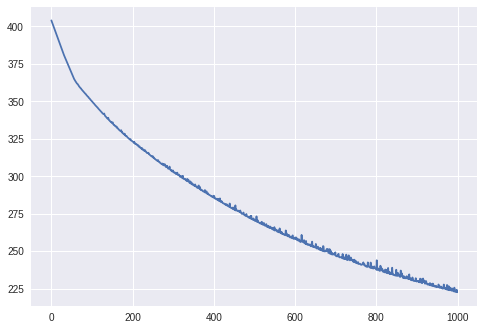

In [179]:
mySVM  = SVM()
xp, yp  = get_data_pair_for_svm(data[0],data[1])
w,b,loss  = mySVM.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
#print(loss)
plt.plot(loss)
plt.show()
plt.style.use('seaborn')

In [180]:
def train_svm(x,y):
    # wts,b --> weights and biases
    svm_classifiers = {}
    for i in range(classes):
        svm_classifiers[i] = {}
        for j in range(i+1,classes):
            xpair,ypair = get_data_pair_for_svm(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair,learning_rate = 0.00001,maxItr = 1000) # call .fit method of SVM class
            svm_classifiers[i][j] = (wts,b)
            
            plt.plot(loss)
            plt.show()
            
    return svm_classifiers

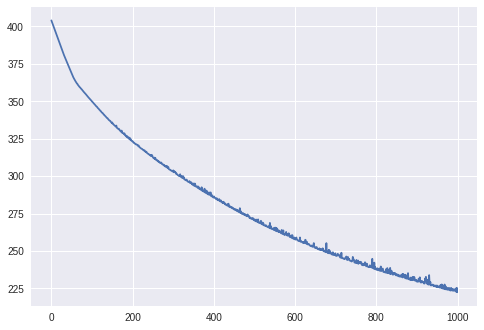

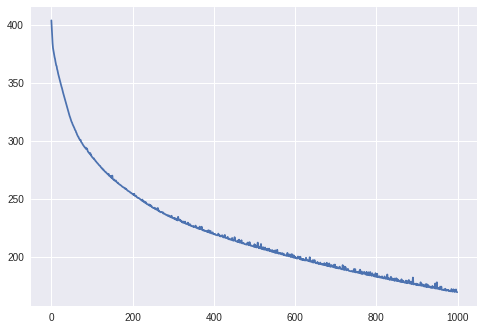

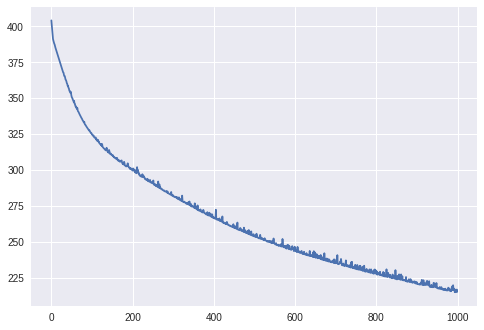

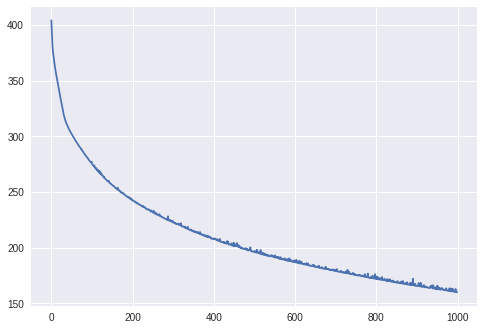

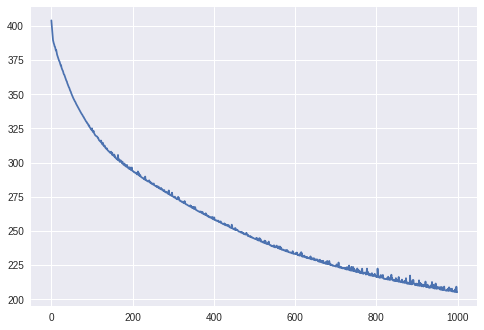

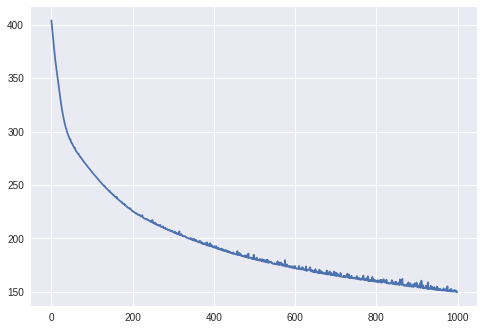

In [181]:
svm_classifiers = train_svm(image_data,labels)

In [182]:
# parameters for cats and dogs
cats_dogs = svm_classifiers[0][1]
cats_humans = svm_classifiers[0][3]
print(cats_dogs[0].shape) # these are weights
print(cats_dogs[1])  #it's a biase terms

(1, 3072)
-0.0275300000000001


## Prediction

In [183]:
def binary_prediction(x,w,b): 
    z = np.dot(x,w.T) + b
    if z>=0:
        return 1
    else:
        return -1
        

In [184]:
def predict(x):
    
    count = np.zeros((classes,))
    
    for i in range(classes):
        for j in range(i+1,classes):
            w,b = svm_classifiers[i][j]
            
            #take a majority prediction
            z = binary_prediction(x,w,b)
            
            if(z==1):
                count[j] +=1
            else:
                count[i] +=1
                
    final_prediction = np.argmax(count)
    return final_prediction

In [185]:
print(predict(image_data[0]))
print(labels[0])

1
1


In [186]:
def accuracy(x,y):
    
    count = 0
    
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        
        if(prediction == y[i]):
            count +=1
            
    return count/x.shape[0]

In [187]:
accuracy(image_data,labels)  # it's a quite good accuracy almost 60%

0.6064356435643564

### SVM using SK-learn

In [188]:
from sklearn import svm

In [189]:
svm_classifier = svm.SVC(kernel = 'linear',C = 1.0)

In [190]:
svm_classifier.fit(image_data,labels)
svm_classifier.score(image_data,labels)

0.6670792079207921

In [ ]:
# in the comparison of sklearn accuracy our algorithm works pretty well